<center>

# Should This Loan be Approved or Denied?

## *Book One: Variable Normalization*

</center>

### Abstract

In this case study, students assume the role of a loan officer at a bank and are asked to approve or deny a loan by assessing its risk of default using logistic regression.

#### About Variable Normalization Notebook

This notebook describes the process of normalizing the data for the case study. The following steps were taken:

- Data quality issues were fixed, such as annotation errors and null values.
- Dummy variables were encoded correctly for use in Python.
- Regions and geographical data were enriched using the US Census 2000.


---

## I. Enviroment

### 1. Libraries
Import the libraries and define their function in the notebook

In [112]:
import pandas as pd
import numpy as np
import geopandas as geo
#
import matplotlib.pyplot as plt
import seaborn as sns
#
from IPython.display import display
from IPython.display import HTML
import sys
#
from warnings import filterwarnings
import gc
#
from MungingOps import GetDataDictionary

### 2. config

In [113]:
filterwarnings('ignore')
gc.enable()

### 3. Styling

In [114]:
#
pd.options.display.float_format = '{:.5f}'.format
#--
sns.set_style("whitegrid")
#palette = ['#44445599','#99222299']

---

## II. Data Loading

In [115]:
# Dataset
df = pd.read_pickle('./dta_00_dataset.dd')#,compression='gzip')
# Data Dictionary
dd = pd.read_pickle('./dta_00_data_dict.dd')#,compression='gzip')
#

In [116]:
#mb of the dataset
mb = sys.getsizeof(df)/1024/1024

In [117]:
print('size of dataset:','{:.2f}'.format(mb)+' mb')

size of dataset: 979.64 mb


data overview

In [118]:
print(df.shape)

display(HTML('<h3>Sample</h3>'))
display(df.head())

display(HTML('<h3>Metadata</h3>'))
display(dd)

display(HTML('<h3>Basic Stats</h3>'))
df.describe().T

(899164, 27)


,id,borrower_name,borrower_city,borrower_state,borrower_zip,bank_name,bank_state,naic,approval_date,approval_fiscal_year,...,revolving_credit,low_doc_loan,default_date,disbursement_date,amount_disbursed,gross_amount_outstanding,loan_status,ghargedoff_amount,gross_amount_approved,guaranteed_sba
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


,Variable,Cluster,Disctint,Values,Type,Nulls,Description
Id,,,,,,,
21,amount_disbursed,4,118859,"[$60,000.00 , $40,000.00 , $287,000.00 , $35,0...",str,0,Amount disbursed
4,borrower_zip,4,33611,"[47711, 46526, 47401, 74012, 32801, 6062, 7083...",numpy.int64,0,Borrower zip code
19,default_date,4,6449,"[nan, 24-Jun-91, 18-Apr-02, 4-Oct-89, 26-Jun-1...",float,736465,loan default´s declaration date
20,disbursement_date,4,8473,"[28-Feb-99, 31-May-97, 31-Dec-97, 30-Jun-97, 1...",str,2368,the date upon which the Loan proceeds
1,borrower_name,4,779584,"[ABC HOBBYCRAFT, LANDMARK BAR & GRILLE (THE), ...",str,14,Borrower Name
24,ghargedoff_amount,4,83165,"[$0.00 , $208,959.00 , $14,084.00 , $44,374.00...",str,0,debt that a company believes it will no longer...
25,gross_amount_approved,4,22128,"[$60,000.00 , $40,000.00 , $287,000.00 , $35,0...",str,0,gross disbursements represent the amount of ch...
2,borrower_city,4,32582,"[EVANSVILLE, NEW PARIS, BLOOMINGTON, BROKEN AR...",str,30,Borrower city
26,guaranteed_sba,4,38326,"[$48,000.00 , $32,000.00 , $215,250.00 , $28,0...",str,0,SBA´s guaranteed amount


,count,mean,std,min,25%,50%,75%,max
id,899164.00000,4772612310.59431,2538175037.45304,1000014003.00000,2589757508.50000,4361439006.00000,6904626504.75000,9996003010.00000
borrower_zip,899164.00000,53804.39124,31184.15915,0.00000,27587.00000,55410.00000,83704.00000,99999.00000
naic,899164.00000,398660.95015,263318.31276,0.00000,235210.00000,445310.00000,561730.00000,928120.00000
spected_term,899164.00000,110.77308,78.85731,0.00000,60.00000,84.00000,120.00000,569.00000
employees,899164.00000,11.41135,74.10820,0.00000,2.00000,4.00000,10.00000,9999.00000
business_type,899028.00000,1.28040,0.45175,0.00000,1.00000,1.00000,2.00000,2.00000
created_jobs,899164.00000,8.43038,236.68817,0.00000,0.00000,0.00000,1.00000,8800.00000
retained_jobs,899164.00000,10.79726,237.12060,0.00000,0.00000,1.00000,4.00000,9500.00000
franchise,899164.00000,2753.72593,12758.01914,0.00000,1.00000,1.00000,1.00000,99999.00000
urban,899164.00000,0.75775,0.64644,0.00000,0.00000,1.00000,1.00000,2.00000


---

## III. Data Quality

Fixing data quality issues

#### 1. Continuos Variables

The first step is to verify and correct the quality of those variables that appear as continuous.

In [119]:
dd[dd.Cluster == 4]

,Variable,Cluster,Disctint,Values,Type,Nulls,Description
Id,,,,,,,
21,amount_disbursed,4,118859,"[$60,000.00 , $40,000.00 , $287,000.00 , $35,0...",str,0,Amount disbursed
4,borrower_zip,4,33611,"[47711, 46526, 47401, 74012, 32801, 6062, 7083...",numpy.int64,0,Borrower zip code
19,default_date,4,6449,"[nan, 24-Jun-91, 18-Apr-02, 4-Oct-89, 26-Jun-1...",float,736465,loan default´s declaration date
20,disbursement_date,4,8473,"[28-Feb-99, 31-May-97, 31-Dec-97, 30-Jun-97, 1...",str,2368,the date upon which the Loan proceeds
1,borrower_name,4,779584,"[ABC HOBBYCRAFT, LANDMARK BAR & GRILLE (THE), ...",str,14,Borrower Name
24,ghargedoff_amount,4,83165,"[$0.00 , $208,959.00 , $14,084.00 , $44,374.00...",str,0,debt that a company believes it will no longer...
25,gross_amount_approved,4,22128,"[$60,000.00 , $40,000.00 , $287,000.00 , $35,0...",str,0,gross disbursements represent the amount of ch...
2,borrower_city,4,32582,"[EVANSVILLE, NEW PARIS, BLOOMINGTON, BROKEN AR...",str,30,Borrower city
26,guaranteed_sba,4,38326,"[$48,000.00 , $32,000.00 , $215,250.00 , $28,0...",str,0,SBA´s guaranteed amount


Time series variables

In [120]:
time_series_var = ['default_date', 'disbursement_date', 'approval_date']

In [121]:
df.default_date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: default_date
Non-Null Count   Dtype 
--------------   ----- 
162699 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [122]:
df.disbursement_date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: disbursement_date
Non-Null Count   Dtype 
--------------   ----- 
896796 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [123]:
df.approval_date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: approval_date
Non-Null Count   Dtype 
--------------   ----- 
899164 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [124]:
for i in time_series_var:
    try:
        df[i] = pd.to_datetime(df[i])
        print(i,': corrected')
    except:
        print('error in:',i)

default_date : corrected
disbursement_date : corrected
approval_date : corrected


Currency Variables

In [125]:
currency_vars = ['amount_disbursed', 'ghargedoff_amount', 'gross_amount_approved', 'guaranteed_sba', 'gross_amount_outstanding']

In [126]:
df.amount_disbursed.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: amount_disbursed
Non-Null Count   Dtype 
--------------   ----- 
899164 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [127]:
df.ghargedoff_amount.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: ghargedoff_amount
Non-Null Count   Dtype 
--------------   ----- 
899164 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [128]:
df.gross_amount_approved.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: gross_amount_approved
Non-Null Count   Dtype 
--------------   ----- 
899164 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [129]:
df.guaranteed_sba.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: guaranteed_sba
Non-Null Count   Dtype 
--------------   ----- 
899164 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [130]:
df.gross_amount_outstanding.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: gross_amount_outstanding
Non-Null Count   Dtype 
--------------   ----- 
899164 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [131]:
for i in currency_vars:
    try:
        df[i] = [float(str(x).replace('$','').replace(',','')) for x in df[i]]
    except:
        print('error in:',i)
    try:
        df[i].astype(np.float16)
        print(i,': corrected')
    except:
        print('error in:',i)

amount_disbursed : corrected
ghargedoff_amount : corrected
gross_amount_approved : corrected
guaranteed_sba : corrected
gross_amount_outstanding : corrected


In [132]:
df['franchise']=df['franchise'].astype(np.int16)

Integer Variables

all the integer values in the variables from the cluster 2 to 4 are bigger than 32767, 

but smaller than 9223372036854775807; then that variables are np.int32

In [133]:
continuos =   set(dd[dd.Cluster==2]['Variable']).union(set(dd[dd.Cluster==4]['Variable']))
non_integer = set(currency_vars).union(set(time_series_var))
integer = list(continuos - non_integer)

In [134]:
tmp = pd.DataFrame()
for i in integer:
    tmp = pd.concat([tmp,dd[dd.isin([i]).any(axis=1)]])
integer_vars = list(tmp.sort_values(by="Disctint", ascending=False).Variable.values)
del tmp
integer_vars

['id', 'borrower_name', 'borrower_zip', 'borrower_city', 'bank_name', 'naic']

deleting string variables from treatment

In [135]:
del integer_vars[integer_vars.index('borrower_name')]
del integer_vars[integer_vars.index('borrower_city')]
del integer_vars[integer_vars.index('bank_name')]

In [136]:
df[integer_vars].isnull().sum()

id              0
borrower_zip    0
naic            0
dtype: int64

In [137]:
df.id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: id
Non-Null Count   Dtype
--------------   -----
899164 non-null  int64
dtypes: int64(1)
memory usage: 6.9 MB


In [138]:
df.borrower_zip.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: borrower_zip
Non-Null Count   Dtype
--------------   -----
899164 non-null  int64
dtypes: int64(1)
memory usage: 6.9 MB


In [139]:
df.naic.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: naic
Non-Null Count   Dtype
--------------   -----
899164 non-null  int64
dtypes: int64(1)
memory usage: 6.9 MB


In [140]:
for i in integer_vars:
    try:
        df[i].astype(np.int32)
        display(HTML('<a>'+i+': corrected</a>'))
    except:
        display(HTML('<strong><a>'+i+': Wow, i find an error!!!</a></strong>'))

In [141]:
#mb of the dataset
mb2 = sys.getsizeof(df)/1024/1024
print('size of dataset:','{:.2f}'.format(mb2)+' mb')
#
print('{:.2f}'.format(mb-mb2)+' mb saved')
print('{:.2f}'.format(100*(1.0-(mb2/float(mb))))+'% less vs original size')

size of dataset: 598.95 mb
380.69 mb saved
38.86% less vs original size



#### 2. Ordinal Variables

correcting the cluster 1 of variables:
* This variables are majorly categorical variables and need much observation for correct or pass to feature engneering

In [142]:
dd[dd.Cluster == 1].sort_values(by="Disctint", ascending=False)

,Variable,Cluster,Disctint,Values,Type,Nulls,Description
Id,,,,,,,
11,employees,1,599,"[4, 2, 7, 14, 19, 45, 1, 3, 24, 5, 16, 12, 6, ...",numpy.int64,0,Number of business employees
10,spected_term,1,412,"[84, 60, 180, 240, 120, 45, 297, 162, 12, 300,...",numpy.int64,0,Loan termination months
14,retained_jobs,1,358,"[0, 7, 23, 4, 6, 1, 9, 20, 2, 5, 19, 8, 3, 10,...",numpy.int64,0,Number of jobs retained
13,created_jobs,1,246,"[0, 7, 30, 5, 4, 1, 20, 10, 3, 8, 16, 15, 6, 1...",numpy.int64,0,Number of jobs created
9,approval_fiscal_year,1,75,"[1997, 1980, 2006, 1998, 1999, 2000, 2001, 197...",int,0,Fiscal year of commitment
6,bank_state,1,57,"[OH, IN, OK, FL, DE, SD, AL, CT, GA, OR, MN, R...",str,1566,Bank state
3,borrower_state,1,52,"[IN, OK, FL, CT, NJ, NC, IL, RI, TX, VA, TN, A...",str,14,Borrower state
17,revolving_credit,1,19,"[N, 0, Y, T, nan, `, ,, 1, C, 3, 2, R, 7, A, 5...",str,4528,Revolving line of credit
22,gross_amount_outstanding,1,15,"[$0.00 , $12,750.00 , $827,875.00 , $25,000.00...",str,0,the total of all remaining payments due under ...


this variables are in the range of np.int16

In [143]:
ordinal_vars = list(dd[dd.Cluster == 1].sort_values(by="Disctint", ascending=True)[dd['Disctint']>57].Variable)
ordinal_vars

['approval_fiscal_year',
 'created_jobs',
 'retained_jobs',
 'spected_term',
 'employees']

In [144]:
for i in ordinal_vars:
    try:
        df[i].astype(np.int16)
        display(HTML('<a>'+i+': corrected</a>'))
    except:
        display(HTML('<strong><a>'+i+': Wow, i find an error!!!</a></strong>'))

approval_fiscal_year have an error, i need to find the specific trouble

In [145]:
df.approval_fiscal_year.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: approval_fiscal_year
Non-Null Count   Dtype 
--------------   ----- 
899164 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [146]:
for x in df.approval_fiscal_year.unique():
    try:
        np.int16(x)
    except ValueError as fnf_error:
        print(x, fnf_error)


1976A invalid literal for int() with base 10: '1976A'


'1976A' is the error

In [147]:
df.approval_fiscal_year = df.approval_fiscal_year.replace('1976A',1976).astype(np.int16)

In [148]:
#mb of the dataset
mb2 = sys.getsizeof(df)/1024/1024
print('size of dataset:','{:.2f}'.format(mb2)+' mb')
#
print('{:.2f}'.format(mb-mb2)+' mb saved')
print('{:.2f}'.format(100*(1.0-(mb2/float(mb))))+'% less vs original size')

size of dataset: 566.67 mb
412.97 mb saved
42.15% less vs original size


#### 3. Categorical Variables

In [149]:
categorical_vars = list(dd[dd.Cluster==1].sort_values(by="Disctint", ascending=False)[dd['Disctint'] <58].Variable)
categorical_vars

['bank_state',
 'borrower_state',
 'revolving_credit',
 'gross_amount_outstanding',
 'low_doc_loan',
 'business_type',
 'urban',
 'loan_status']

**bank_state**

In [150]:
df.bank_state.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: bank_state
Non-Null Count   Dtype 
--------------   ----- 
897598 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [151]:
print(len(df['bank_state'].unique()))
df['bank_state'].unique()

57


array(['OH', 'IN', 'OK', 'FL', 'DE', 'SD', 'AL', 'CT', 'GA', 'OR', 'MN',
       'RI', 'NC', 'TX', 'MD', 'NY', 'TN', 'SC', 'MS', 'MA', 'LA', 'IA',
       'VA', 'CA', 'IL', 'KY', 'PA', 'MO', 'WA', 'MI', 'UT', 'KS', 'WV',
       'WI', 'AZ', 'NJ', 'CO', 'ME', 'NH', 'AR', 'ND', 'MT', 'ID', nan,
       'WY', 'NM', 'DC', 'NV', 'NE', 'PR', 'HI', 'VT', 'AK', 'GU', 'AN',
       'EN', 'VI'], dtype=object)

In [152]:
del categorical_vars[categorical_vars.index('bank_state')]
categorical_vars

['borrower_state',
 'revolving_credit',
 'gross_amount_outstanding',
 'low_doc_loan',
 'business_type',
 'urban',
 'loan_status']

**borrower_state**

In [153]:
df.borrower_state.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: borrower_state
Non-Null Count   Dtype 
--------------   ----- 
899150 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [154]:
print(len(df['borrower_state'].unique()))
df['borrower_state'].unique()


52


array(['IN', 'OK', 'FL', 'CT', 'NJ', 'NC', 'IL', 'RI', 'TX', 'VA', 'TN',
       'AR', 'MN', 'MO', 'MA', 'CA', 'SC', 'LA', 'IA', 'OH', 'KY', 'MS',
       'NY', 'MD', 'PA', 'OR', 'ME', 'KS', 'MI', 'AK', 'WA', 'CO', 'MT',
       'WY', 'UT', 'NH', 'WV', 'ID', 'AZ', 'NV', 'WI', 'NM', 'GA', 'ND',
       'VT', 'AL', 'NE', 'SD', 'HI', 'DE', 'DC', nan], dtype=object)

In [155]:
del categorical_vars[categorical_vars.index('borrower_state')]
categorical_vars

['revolving_credit',
 'gross_amount_outstanding',
 'low_doc_loan',
 'business_type',
 'urban',
 'loan_status']

**revolving_credit** 

in this variable 0 is none, then i normalize values to build a dummy variable

In [156]:
df.revolving_credit.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: revolving_credit
Non-Null Count   Dtype 
--------------   ----- 
894636 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [157]:
df.revolving_credit.unique()

array(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7',
       'A', '5', '.', '4', '-', 'Q'], dtype=object)

revolving_credit: Data normalization

In [158]:
df.revolving_credit = df.revolving_credit.replace('N',0)
df.revolving_credit = df.revolving_credit.replace('0',0)
df.revolving_credit = df.revolving_credit.replace('1',1)
df.revolving_credit = df.revolving_credit.replace('Y',1)

In [159]:
df.groupby(by='revolving_credit').agg('count')['id']

revolving_credit
0    677890
1    201420
,         1
-         1
.         1
2         6
3         1
4         1
5         1
7         1
A         1
C         2
Q         1
R        14
T     15284
`        11
Name: id, dtype: int64

        the distinc values aparently aren't significant, i will delete

In [160]:
df.revolving_credit = np.where(np.logical_or(df.revolving_credit == 0, df.revolving_credit == 1), df.revolving_credit, np.nan)

verify

In [161]:
df.revolving_credit.unique()

array([0, 1, nan], dtype=object)

In [162]:
categorical_vars

['revolving_credit',
 'gross_amount_outstanding',
 'low_doc_loan',
 'business_type',
 'urban',
 'loan_status']

**gross_amount_outstanding**

This variable was treated as currency, now aparently is a categorical value

In [163]:
df.gross_amount_outstanding.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: gross_amount_outstanding
Non-Null Count   Dtype  
--------------   -----  
899164 non-null  float64
dtypes: float64(1)
memory usage: 6.9 MB


In [164]:
print(len(df.gross_amount_outstanding.unique()))
df.gross_amount_outstanding.unique()

15


array([0.00000e+00, 1.27500e+04, 8.27875e+05, 2.50000e+04, 3.71000e+04,
       4.31270e+04, 8.46170e+04, 1.76000e+03, 1.15820e+05, 9.96262e+05,
       3.95476e+05, 4.15090e+04, 6.00000e+02, 9.11100e+03, 9.69080e+04])

Yes is a category

In [165]:
pd.Series(df.gross_amount_outstanding.unique())

0         0.00000
1     12750.00000
2    827875.00000
3     25000.00000
4     37100.00000
5     43127.00000
6     84617.00000
7      1760.00000
8    115820.00000
9    996262.00000
10   395476.00000
11    41509.00000
12      600.00000
13     9111.00000
14    96908.00000
dtype: float64

aparently does need work

In [166]:
del categorical_vars[categorical_vars.index('gross_amount_outstanding')]
categorical_vars

['revolving_credit', 'low_doc_loan', 'business_type', 'urban', 'loan_status']

**low_doc_loan** LowDoc Loan Program: Y  Yes, N  No

“LowDoc Loan” program was implemented where loans under $150,000 can be processed using a one-page application.

Si tiene una nota y es menor a 150,000 podemos inferir que si es low doc

In [167]:
df.low_doc_loan.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: low_doc_loan
Non-Null Count   Dtype 
--------------   ----- 
896582 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [168]:
df.low_doc_loan.unique()

array(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'], dtype=object)

In [169]:
df.low_doc_loan = df.low_doc_loan.replace('Y',1)
df.low_doc_loan = df.low_doc_loan.replace('N',0)

In [170]:
df.low_doc_loan=df.low_doc_loan.fillna('NA')

In [171]:
'''
low_doc_loan normalization through formal proofs
================================================

This can be a bit confusing rather than tricky but faster than a loop,
the loop can be an computational approach to building the problem:

chng=[]
for i in df.index:
    # if the cell have a normalized value then the value
    if df.low_doc_loan[i] == 1 or df.low_doc_loan[i] == 0 or df.low_doc_loan[i] == 'NA':
        chng.append(df.low_doc_loan[i])
    # if the cell have an unkwnow value and is less than 150,000 then 1
    elif ((df.low_doc_loan[i] == 'C') | (df.low_doc_loan[i] == 'S') | (df.low_doc_loan[i] == 'R') | (df.low_doc_loan[i] == 'A')) | (df.gross_amount_approved[i] < 150000):
        chng.append(1)
    # else 0
    else:
        chng.append(0)

derived from that, we can see three formal proofs to be analyzed with numpy 
for fastest resolution. The average speed for looping is 450 seg, and 1.05
for numpy logical proofs
'''
#logical proofs:
#
# low_doc_loan is 1,0 or NA (normalized values)
formal_proof_one =  np.logical_or(
                            np.logical_or(
                                df.low_doc_loan == 0, df.low_doc_loan == 1),
                                df.low_doc_loan == 'NA'
                            )
#
# low_doc_loan is C,S,R or A (observed values)
formal_proof_two=   np.logical_or(
                                df.low_doc_loan == '0',
                                np.logical_or(
                                    df.low_doc_loan == '1',
                                    np.logical_or(
                                        np.logical_or(
                                            np.logical_or(
                                                df.low_doc_loan == 'C',
                                                df.low_doc_loan == 'S'
                                                ), #Or
                                            df.low_doc_loan == 'R'
                                            ), #Or
                                        df.low_doc_loan == 'A'
                                        ) #Or
                                )
                    )
#
# low_doc_loan is C,S,R or A (observed values) and bellow the legal limit
formal_proof_three = np.logical_and(formal_proof_two, df.gross_amount_approved < 150000.0)


In [172]:
# if formal proof...
#If low_doc_loan is 1,0 or NA (normalized values) preserve, else...
# low_doc_loan == 1 if C,S,R or A (observed values) and below the legal limit
# low_doc_loan == 0 if C,S,R or A (observed values) and cross the legal limit
df.low_doc_loan =   np.where(formal_proof_one, df.low_doc_loan,
                            np.where(formal_proof_three, 1,
                                    np.where(formal_proof_two, 0, df.low_doc_loan)
                            )
)

In [173]:
# Converting nan values
df.low_doc_loan = df.low_doc_loan.replace('NA',np.nan)

In [174]:
# Verification
df.low_doc_loan.unique()

array([ 1.,  0., nan])

In [175]:
# Calculates next var to work
del categorical_vars[categorical_vars.index('low_doc_loan')]
categorical_vars

['revolving_credit', 'business_type', 'urban', 'loan_status']

**business_type** is new?

In [176]:
df.business_type.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: business_type
Non-Null Count   Dtype  
--------------   -----  
899028 non-null  float64
dtypes: float64(1)
memory usage: 6.9 MB


In [177]:
# rename
df['new_business'] = df['business_type']
df =  df.drop(columns=['business_type'])

In [178]:
# explore values
df.new_business.unique()

array([ 2.,  1.,  0., nan])

In [179]:
# 
df.new_business=df.new_business.replace(0,np.nan)

In [180]:
df.new_business=df.new_business.replace(1,0)
df.new_business=df.new_business.replace(2,1)

In [181]:
df.new_business.unique()

array([ 1.,  0., nan])

In [182]:
del categorical_vars[categorical_vars.index('business_type')]
categorical_vars

['revolving_credit', 'urban', 'loan_status']

**urban** in this variable 0 is null, then i substitute to build a dummy variable

In [183]:
df.urban.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: urban
Non-Null Count   Dtype
--------------   -----
899164 non-null  int64
dtypes: int64(1)
memory usage: 6.9 MB


In [184]:
df.urban.unique()

array([0, 1, 2], dtype=int64)

In [185]:
df.urban = df.urban.replace(0,np.nan)
df.urban = df.urban.replace(1,0)
df.urban = df.urban.replace(2,1)

In [186]:
df.urban.unique()

array([nan,  0.,  1.])

In [187]:
del categorical_vars[categorical_vars.index('urban')]
categorical_vars

['revolving_credit', 'loan_status']

**loan_status** 

Loan status charged off D CHGOFF, Paid in full D PIF


In [188]:
df.loan_status.info()

<class 'pandas.core.series.Series'>
RangeIndex: 899164 entries, 0 to 899163
Series name: loan_status
Non-Null Count   Dtype 
--------------   ----- 
897167 non-null  object
dtypes: object(1)
memory usage: 6.9+ MB


In [189]:
df.loan_status.unique()

array(['P I F', 'CHGOFF', nan], dtype=object)

In [190]:
df = df.replace('P I F','PIF')

In [191]:
df.loan_status.unique()

array(['PIF', 'CHGOFF', nan], dtype=object)


review what means loan status and create a dummy variable

#### 4. Dataset inspection

In [192]:
#mb of the dataset
mb3 = sys.getsizeof(df)/1024/1024
print('size of dataset:','{:.2f}'.format(mb3)+' mb')
#
print('{:.2f}'.format(mb-mb3)+' mb saved')
print('{:.2f}'.format(100*(1.0-(mb3/float(mb))))+'% less vs original size')

size of dataset: 479.69 mb
499.95 mb saved
51.03% less vs original size


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        899164 non-null  int64         
 1   borrower_name             899150 non-null  object        
 2   borrower_city             899134 non-null  object        
 3   borrower_state            899150 non-null  object        
 4   borrower_zip              899164 non-null  int64         
 5   bank_name                 897605 non-null  object        
 6   bank_state                897598 non-null  object        
 7   naic                      899164 non-null  int64         
 8   approval_date             899164 non-null  datetime64[ns]
 9   approval_fiscal_year      899164 non-null  int16         
 10  spected_term              899164 non-null  int64         
 11  employees                 899164 non-null  int64         
 12  cr

In [194]:
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,899164.00000,NaN,NaN,NaN,NaT,NaT,4772612310.59431,2538175037.45304,1000014003.00000,2589757508.50000,4361439006.00000,6904626504.75000,9996003010.00000
borrower_name,899150,779583,SUBWAY,1269,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
borrower_city,899134,32581,LOS ANGELES,11558,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
borrower_state,899150,51,CA,130619,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
borrower_zip,899164.00000,NaN,NaN,NaN,NaT,NaT,53804.39124,31184.15915,0.00000,27587.00000,55410.00000,83704.00000,99999.00000
bank_name,897605,5802,BANK OF AMERICA NATL ASSOC,86853,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bank_state,897598,56,CA,118116,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
naic,899164.00000,NaN,NaN,NaN,NaT,NaT,398660.95015,263318.31276,0.00000,235210.00000,445310.00000,561730.00000,928120.00000
approval_date,899164,9859,1993-07-07 00:00:00,1131,1973-02-06,2072-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
approval_fiscal_year,899164.00000,NaN,NaN,NaN,NaT,NaT,2001.14356,5.91385,1962.00000,1997.00000,2002.00000,2006.00000,2014.00000


In [195]:
df2 = df.copy()

In [196]:
del df

**adendum**

This have an iterative nature: In the process to make the EDA is discovered the nature of this variables: naic, borrower_city, borrower_zip. And data enrichment is nedd to perform feature engineering

## IV Data Enrichment

To incorporate new updates and information into existing database to improve accuracy and add missing information

- urban:
    - there is a lot of nulls, i try to fill with the census data; and of course verify. But prediction process is needed
    - The process is distiled at this [notebook](./03_univariate_imputation.ipynb) after the basic univariate EDA [notebook](./02_EDA.ipynb)
- naic:
    - Need to be reduced, as categoraical data need to be analyzed in a less specific way following the 2 digits of the structure of NAICS 2002
- borrower_city:
    - not used for eda, drop
- borrower_zip:
    - Converted in ordinal value, for this need to be decomposed following the 3-Digit ZIP Code Prefix Matrix of usps,
    - files obtained from [2007 TIGER/Line® Shapefiles: ZIP Code Tabulation Areas](https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2007&layergroup=ZIP+Code+Tabulation+Areas)
    - 1 digit and 3 digit are allowed for EDA, 5 digit for advanced insights
        - borrower_zip[0] - National Zone
        - borrower_zip[1:2] - Sectional Center
        - borrower_zip[-2:] - Delivery Zone


#### naic

In [197]:
#two_digit_naic = [str(x)[0:2] for x in df2.naic]
df2.naic = df2.naic.astype(str)
df2['two_digit_naic'] = df2.naic.str.slice(0, 2)
df2['two_digit_naic'].head()

0    45
1    72
2    62
3     0
4     0
Name: two_digit_naic, dtype: object

#### borrower_city

In [198]:
df2 = df2.drop(columns=['borrower_city'])

#### borrower_zip

In [199]:
#borrower_national_zone = [str(x)[0] for x in df2.borrower_zip]
df2.borrower_zip= df2.borrower_zip.astype(str)
df2['borrower_national_zone'] = df2.borrower_zip.str.slice(0,1,1)
df2['borrower_national_zone'].head()

0    4
1    4
2    4
3    7
4    3
Name: borrower_national_zone, dtype: object

In [200]:
#borrower_national_section = [str(x)[0:3] for x in df2.borrower_zip]
df2['borrower_national_section'] = df2.borrower_zip.str.slice(0,3,1)
df2['borrower_national_section'].head()

0    477
1    465
2    474
3    740
4    328
Name: borrower_national_section, dtype: object

In [201]:
df_zip = geo.read_file('./raw/fe_2007_us_zcta300/fe_2007_us_zcta300.shp')

In [202]:
df_zip.head(3)

,ZCTA3CE00,CLASSFP00,MTFCC00,FUNCSTAT00,geometry
0,967,B3,G6340,S,"MULTIPOLYGON (((-154.92893 19.67360, -154.9202..."
1,968,B3,G6340,S,"MULTIPOLYGON (((-166.12500 23.60711, -166.1250..."
2,199,B3,G6340,S,"POLYGON ((-75.33236 39.26080, -75.32102 39.251..."


In [203]:
df_zip = df_zip.drop(columns=['CLASSFP00','MTFCC00','FUNCSTAT00'])

In [204]:
df3 = pd.merge(df2,df_zip,how='left',left_on='borrower_national_section',right_on='ZCTA3CE00').drop(columns=['ZCTA3CE00'])

In [205]:
df3.head()

,id,borrower_name,borrower_state,borrower_zip,bank_name,bank_state,naic,approval_date,approval_fiscal_year,spected_term,...,gross_amount_outstanding,loan_status,ghargedoff_amount,gross_amount_approved,guaranteed_sba,new_business,two_digit_naic,borrower_national_zone,borrower_national_section,geometry
0,1000014003,ABC HOBBYCRAFT,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,...,0.00000,PIF,0.00000,60000.00000,48000.00000,1.00000,45,4,477,"POLYGON ((-87.46948 37.93075, -87.47007 37.930..."
1,1000024006,LANDMARK BAR & GRILLE (THE),IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,...,0.00000,PIF,0.00000,40000.00000,32000.00000,1.00000,72,4,465,"MULTIPOLYGON (((-86.19800 41.70928, -86.19808 ..."
2,1000034009,"WHITLOCK DDS, TODD M.",IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,...,0.00000,PIF,0.00000,287000.00000,215250.00000,0.00000,62,4,474,"POLYGON ((-87.27938 39.15727, -87.27827 39.157..."
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,...,0.00000,PIF,0.00000,35000.00000,28000.00000,0.00000,0,7,740,"MULTIPOLYGON (((-97.26480 36.05934, -97.26483 ..."
4,1000054004,"ANASTASIA CONFECTIONS, INC.",FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,...,0.00000,PIF,0.00000,229000.00000,229000.00000,0.00000,0,3,328,"MULTIPOLYGON (((-81.37739 28.58441, -81.37739 ..."


In [206]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899164 entries, 0 to 899163
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id                         899164 non-null  int64         
 1   borrower_name              899150 non-null  object        
 2   borrower_state             899150 non-null  object        
 3   borrower_zip               899164 non-null  object        
 4   bank_name                  897605 non-null  object        
 5   bank_state                 897598 non-null  object        
 6   naic                       899164 non-null  object        
 7   approval_date              899164 non-null  datetime64[ns]
 8   approval_fiscal_year       899164 non-null  int16         
 9   spected_term               899164 non-null  int64         
 10  employees                  899164 non-null  int64         
 11  created_jobs               899164 non-null  int64   

        memory management

In [207]:
df3
del df2
del df_zip
gc.collect()

18

## V. Null Values

In [208]:
print('there is the', str("{0:.2f}".format((df3.geometry.isnull().sum() / df3.shape[0])*100))+'%','of null values')

there is the 0.96% of null values


In [209]:
df3
gc.collect()

0

In [210]:
to_drop = list(set(df3.columns.values) - set(['urban','default_date','spected_term','loan_status']))
#to_drop

In [211]:
df3 = df3.dropna(subset= to_drop)

In [212]:
df3.naic = df3.naic.replace(0,np.nan)

In [213]:
df3 = df3.drop(columns=['borrower_name'])

In [214]:
df3
gc.collect()

0

In [215]:
#mb of the dataset
mb3 = sys.getsizeof(df3)/1024/1024
print('size of dataset:','{:.2f}'.format(mb3)+' mb')
#
print('{:.2f}'.format(mb-mb3)+' mb saved')
print('{:.2f}'.format(100*(1.0-(mb3/float(mb))))+'%')

size of dataset: 588.90 mb
390.74 mb saved
39.89%


    Shapefiles are a popular format for storing geographic data, but they have some limitations. One limitation is that they cannot store string values. 
    Another limitation is that they can be large in size for repeated values. One proposed solution to these limitations is to drop the null values in 
    the join, delete the geometry column in non geometrical dataset, and use the geometrical and economic data as Dim tables. This solution would allow 
    the shapefile and for string values to be stored in a tabular way.

    However, there is no reason to put all the data together. It is possible to store the geometrical and economic data in separate tables. This would 
    allow for better data management and would make the data more accessible.

<center>
<img src="database.png">
</center>

In [216]:
df3.dropna(subset='geometry', inplace=True)

In [217]:
df3.drop(columns=['geometry'], inplace=True)

<AxesSubplot: >

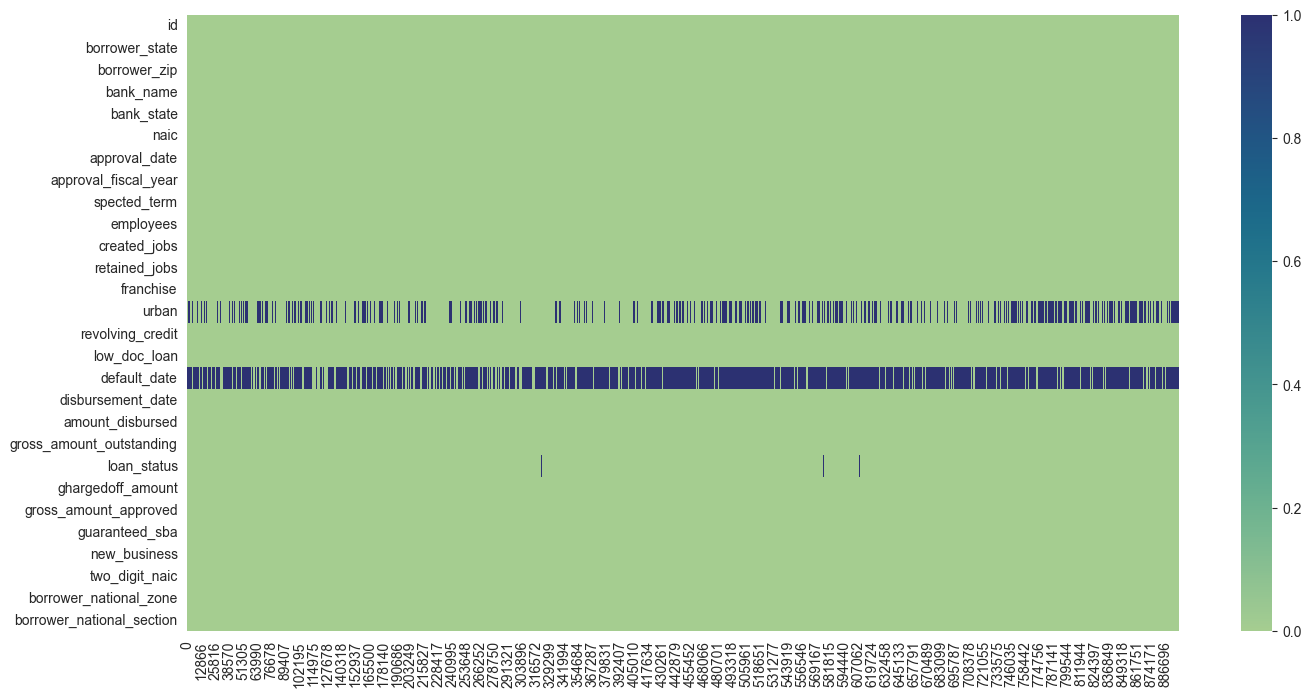

In [218]:
figure = plt.figure(figsize=(16, 8))
sns.heatmap(df3.T.isnull(), cmap="crest", annot=False)

<Figure size 1600x800 with 0 Axes>

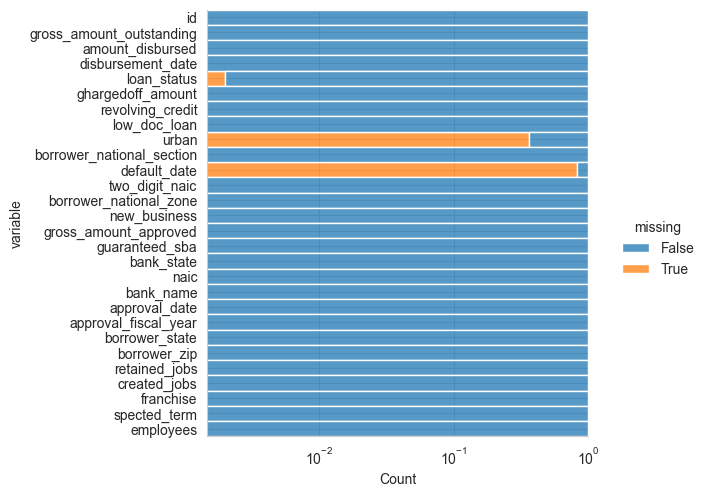

In [219]:
plt.figure(figsize=(16, 8))
sns.displot(
    data=df3.isna().melt(value_name="missing").sort_values(by="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.xscale('log')
plt.show()

1. The null values of the dummy variable "urban" risen
    - Need to be calculated.
2. default date posee una gran cantidad de nulos, 
    - la mayoria paga.

In [220]:
df3.drop(columns=['borrower_zip','naic', 'franchise','bank_name','id'], inplace=True)

In [221]:
gc.collect()
df3.to_pickle('./dta_01_dataset_dta.dd', compression='gzip')